

---



---



---



---



---



---



# Task-2

### Collaborative filtering (Item based approach using knn)


importing libraries



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
import matlplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/C__Users_Nabeel-pc_Desktop_movies_dataframe_grouplens.csv')

In [3]:
df.head(12)

MovieID                               Title                        Genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller
10       11      American President, The (1995)          Comedy|Drama|Romance
11       12  Dracula: Dead and Loving It (1995)                 Comedy|Horror

In [4]:
df.shape

(3883, 3)

In [5]:
df.describe()

MovieID
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
#on users data
df_users=pd.read_csv("/content/users.csv")

In [9]:
df_users.head(20)

UserID Gender  Age  Occupation Zip-code
0        1      F    1          10    48067
1        2      M   56          16    70072
2        3      M   25          15    55117
3        4      M   45           7     2460
4        5      M   25          20    55455
5        6      F   50           9    55117
6        7      M   35           1     6810
7        8      M   25          12    11413
8        9      M   25          17    61614
9       10      F   35           1    95370
10      11      F   25           1     4093
11      12      M   25          12    32793
12      13      M   45           1    93304
13      14      M   35           0    60126
14      15      M   25           7    22903
15      16      F   35           0    20670
16      17      M   50           1    95350
17      18      F   18           3    95825
18      19      M    1          10    48073
19      20      M   25          14    55113

In [10]:
df_users.shape

(6040, 5)

In [11]:
df_users.describe()

UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000

In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [17]:
#Ratings data
df_ratings=pd.read_csv("/content/ratings.csv")
df_ratings.head(20)

UserID  MovieID  Rating  Timestamp
0        1     1193       5  978300760
1        1      661       3  978302109
2        1      914       3  978301968
3        1     3408       4  978300275
4        1     2355       5  978824291
5        1     1197       3  978302268
6        1     1287       5  978302039
7        1     2804       5  978300719
8        1      594       4  978302268
9        1      919       4  978301368
10       1      595       5  978824268
11       1      938       4  978301752
12       1     2398       4  978302281
13       1     2918       4  978302124
14       1     1035       5  978301753
15       1     2791       4  978302188
16       1     2687       3  978824268
17       1     2018       4  978301777
18       1     3105       5  978301713
19       1     2797       4  978302039

In [18]:
df_ratings.shape

(1000209, 4)

In [19]:
df_ratings.describe()

UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09

In [20]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [21]:
#merging of movies,users and ratings dataset
df_merge=pd.merge(df_users,df_ratings,on='UserID',how='left')

In [22]:
df_merge

UserID Gender  Age  Occupation Zip-code  MovieID  Rating  Timestamp
0             1      F    1          10    48067     1193       5  978300760
1             1      F    1          10    48067      661       3  978302109
2             1      F    1          10    48067      914       3  978301968
3             1      F    1          10    48067     3408       4  978300275
4             1      F    1          10    48067     2355       5  978824291
...         ...    ...  ...         ...      ...      ...     ...        ...
1000204    6040      M   25           6    11106     1091       1  956716541
1000205    6040      M   25           6    11106     1094       5  956704887
1000206    6040      M   25           6    11106      562       5  956704746
1000207    6040      M   25           6    11106     1096       4  956715648
1000208    6040      M   25           6    11106     1097       4  956715569

[1000209 rows x 8 columns]

In [23]:
df_merge2=pd.merge(df_merge,df,on='MovieID',how='left')
df_merge2

UserID  ...                           Genres
0             1  ...                            Drama
1             1  ...     Animation|Children's|Musical
2             1  ...                  Musical|Romance
3             1  ...                            Drama
4             1  ...      Animation|Children's|Comedy
...         ...  ...                              ...
1000204    6040  ...                           Comedy
1000205    6040  ...                Drama|Romance|War
1000206    6040  ...                     Comedy|Drama
1000207    6040  ...                            Drama
1000208    6040  ...  Children's|Drama|Fantasy|Sci-Fi

[1000209 rows x 10 columns]

In [24]:
df_merge2.shape

(1000209, 10)

In [25]:
print(df_merge2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Timestamp   1000209 non-null  int64 
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB
None


In [26]:
print(df_merge2['Genres'].value_counts())

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64


In [27]:
print(df_merge2['Title'].value_counts())

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Elstree Calling (1930)                                      1
Waltzes from Vienna (1933)                                  1
Death in Brunswick (1991)                                   1
Slappy and the Stinkers (1998)                              1
Terror in a Texas Town (1958)                               1
Name: Title, Length: 3706, dtype: int64


## **Data Analysis**

In [28]:
#displays high rated movies
high_rated=df_merge2['Rating']>4

In [29]:

df_merge2[high_rated][['Title','Genres','Rating']].head(30)

Title  ... Rating
0       One Flew Over the Cuckoo's Nest (1975)  ...      5
4                         Bug's Life, A (1998)  ...      5
6                               Ben-Hur (1959)  ...      5
7                    Christmas Story, A (1983)  ...      5
10                 Beauty and the Beast (1991)  ...      5
14                  Sound of Music, The (1965)  ...      5
18                           Awakenings (1990)  ...      5
22                   Back to the Future (1985)  ...      5
23                     Schindler's List (1993)  ...      5
25                           Pocahontas (1995)  ...      5
36              Last Days of Disco, The (1998)  ...      5
37                           Cinderella (1950)  ...      5
39                            Apollo 13 (1995)  ...      5
40                            Toy Story (1995)  ...      5
41                             Rain Man (1988)  ...      5
45                         Mary Poppins (1964)  ...      5
46                                Dumbo (1941)  ...      5
48                  Saving Private Ryan (1998)  ...      5
53                                Shine (1996)  ...      5
59                      Few Good Men, A (1992)  ...      5
63                         Hustler, The (1961)  ...      5
68                            Gladiator (2000)  ...      5
79            Hunt for Red October, The (1990)  ...      5
81                          Simon Birch (1998)  ...      5
85                          Stand by Me (1986)  ...      5
86                      Green Mile, The (1999)  ...      5
88                               Gandhi (1982)  ...      5
93                           Braveheart (1995)  ...      5
97   Close Encounters of the Third Kind (1977)  ...      5
102                   On the Waterfront (1954)  ...      5

[30 rows x 3 columns]

In [30]:
#displays low rated movies
#displays high rated movies
high_rated=df_merge2['Rating']<4
df_merge2[high_rated][['Title','Genres','Rating']].head(30)

Title  ... Rating
1                     James and the Giant Peach (1996)  ...      3
2                                  My Fair Lady (1964)  ...      3
5                           Princess Bride, The (1987)  ...      3
16                                       Tarzan (1999)  ...      3
20                                Pleasantville (1998)  ...      3
21   Wallace & Gromit: The Best of Aardman Animatio...  ...      3
24                               Meet Joe Black (1998)  ...      3
29                               Close Shave, A (1995)  ...      3
56                           Courage Under Fire (1996)  ...      3
60    Star Wars: Episode I - The Phantom Menace (1999)  ...      3
61                        Rebel Without a Cause (1955)  ...      3
62                                 Total Recall (1990)  ...      3
65                               U.S. Marshalls (1998)  ...      3
66                                  Jackal, The (1997)  ...      3
67                                   GoodFellas (1990)  ...      2
69                              Double Jeopardy (1999)  ...      3
71                                          Ran (1985)  ...      3
73                                  Cliffhanger (1993)  ...      2
74                                   Snake Eyes (1998)  ...      3
75                                    Backdraft (1991)  ...      2
76                             Fisher King, The (1991)  ...      3
78               Day the Earth Stood Still, The (1951)  ...      3
80                                     Outbreak (1995)  ...      3
83                       Breakfast at Tiffany's (1961)  ...      2
91                                Patriot Games (1992)  ...      2
92                               Bodyguard, The (1992)  ...      3
94                                        Ronin (1998)  ...      3
95                                      Payback (1999)  ...      3
99                          Alien: Resurrection (1997)  ...      3
100                       Guns of Navarone, The (1961)  ...      3

[30 rows x 3 columns]

In [31]:
split_data,split_data.Genres = df_merge2.iloc[[i   for i,j in enumerate(df['Genres']) for value in j.split("|")] , :],[value for i in df['Genres'] for value in i.split("|")]
split_data.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


UserID Gender  ...                                   Title      Genres
0       1      F  ...  One Flew Over the Cuckoo's Nest (1975)   Animation
0       1      F  ...  One Flew Over the Cuckoo's Nest (1975)  Children's
0       1      F  ...  One Flew Over the Cuckoo's Nest (1975)      Comedy
1       1      F  ...        James and the Giant Peach (1996)   Adventure
1       1      F  ...        James and the Giant Peach (1996)  Children's
1       1      F  ...        James and the Giant Peach (1996)     Fantasy
2       1      F  ...                     My Fair Lady (1964)      Comedy
2       1      F  ...                     My Fair Lady (1964)     Romance
3       1      F  ...                  Erin Brockovich (2000)      Comedy
3       1      F  ...                  Erin Brockovich (2000)       Drama

[10 rows x 10 columns]

In [32]:
#top 25 most rated movies
most_rated=df_merge2.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [33]:
#which movies are most highly rated according to average rating
movie_stats=df_merge2.groupby('Title').agg({'Rating':[np.size,np.mean]})
movie_stats.head()

Rating          
                                size      mean
Title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [34]:
movie_stats.sort_values([('Rating','mean')],ascending=False).head(25)

Rating          
                                                     size      mean
Title                                                              
Ulysses (Ulisse) (1954)                                 1  5.000000
Lured (1947)                                            1  5.000000
Follow the Bitch (1998)                                 1  5.000000
Bittersweet Motel (2000)                                1  5.000000
Song of Freedom (1936)                                  1  5.000000
One Little Indian (1973)                                1  5.000000
Smashing Time (1967)                                    2  5.000000
Schlafes Bruder (Brother of Sleep) (1995)               1  5.000000
Gate of Heavenly Peace, The (1995)                      3  5.000000
Baby, The (1973)                                        1  5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                     5  4.800000
Lamerica (1994)                                         8  4.750000
Apple, The (Sib) (1998)                                 9  4.666667
Sanjuro (1962)                                         69  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Dry Cleaning (Nettoyage � sec) (1997)                   2  4.500000
Inheritors, The (Die Siebtelbauern) (1998)              2  4.500000
Mamma Roma (1962)                                       2  4.500000
Bells, The (1926)                                       2  4.500000

In [35]:
#slicing out columns to display only title and genres columns from df_merge2.csv
df_merge2[['Title','Genres']].head()

Title                        Genres
0  One Flew Over the Cuckoo's Nest (1975)                         Drama
1        James and the Giant Peach (1996)  Animation|Children's|Musical
2                     My Fair Lady (1964)               Musical|Romance
3                  Erin Brockovich (2000)                         Drama
4                    Bug's Life, A (1998)   Animation|Children's|Comedy

In [36]:
df_merge2.shape

(1000209, 10)

Keeping in mind the broad categories of recommendation system algorithms,what features you will need and why?


In [37]:
df_merge2.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID',
       'Rating', 'Timestamp', 'Title', 'Genres'],
      dtype='object')

In [38]:
df_merge2.shape

(1000209, 10)

In [39]:
Num_cols=df_merge2._get_numeric_data()
Num_cols.head(5)

UserID  Age  Occupation  MovieID  Rating  Timestamp
0       1    1          10     1193       5  978300760
1       1    1          10      661       3  978302109
2       1    1          10      914       3  978301968
3       1    1          10     3408       4  978300275
4       1    1          10     2355       5  978824291

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_=df_merge2.copy()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
le_df.head()

Gender  Zip-code  Title  Genres  ...  Occupation  MovieID  Rating  Timestamp
0       0      1429   2452     239  ...          10     1193       5  978300760
1       0      1429   1739     152  ...          10      661       3  978302109
2       0      1429   2289     282  ...          10      914       3  978301968
3       0      1429   1054     239  ...          10     3408       4  978300275
4       0      1429    557     145  ...          10     2355       5  978824291

[5 rows x 10 columns]

In [41]:
corr = le_df.corr()
corr.head()

Gender  Zip-code     Title  ...   MovieID    Rating  Timestamp
Gender    1.000000 -0.015056  0.000972  ...  0.021626 -0.019861  -0.008895
Zip-code -0.015056  1.000000  0.003718  ...  0.000758  0.000776   0.022555
Title     0.000972  0.003718  1.000000  ... -0.015053  0.012247  -0.001983
Genres   -0.073500 -0.014125 -0.063523  ...  0.029295  0.060061   0.030552
UserID   -0.035042 -0.044845 -0.000375  ... -0.017739  0.012303  -0.490383

[5 rows x 10 columns]

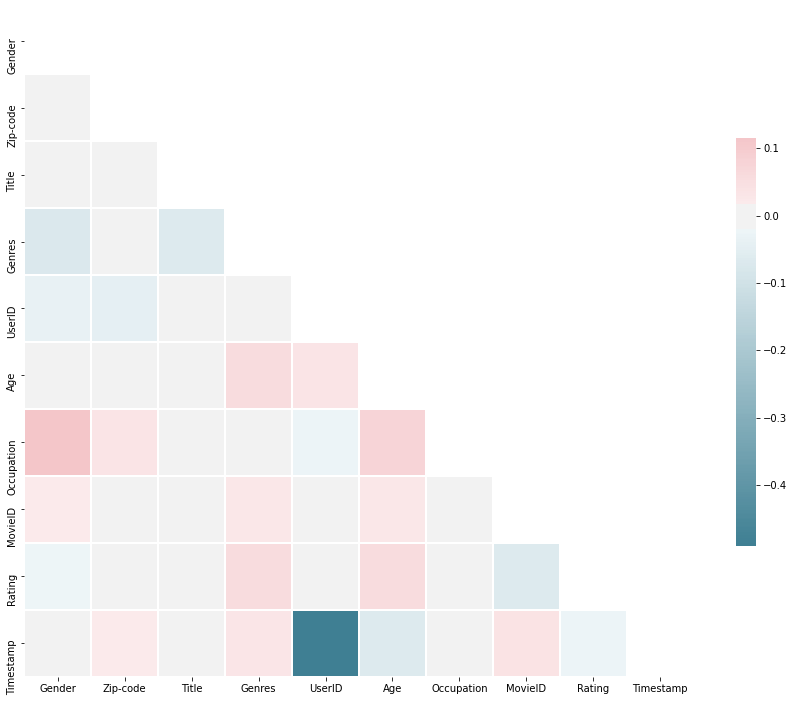

In [42]:
import numpy as np
from matplotlib import pyplot as plt
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

Depicts relationship between two or more variables within a dataset



1. It is a degree of measure which can be Positive , Negative or Unrelated (No effect)
2.Positive Correlation : implies as increase (or decrease) in one variable, leads to a simultaneous increase (decrease) in the other variable
3.Negative Correlation : is a type where if there is a decrease (or increase) in one variable, then there is a simultaneous increase (or decrease) in the other variables.Inverse behaviour in variables
4.Uncorrelated : When both variables have no corresponding impact on each other on increase or decrease.They are supposed to be mutually exclusive

**Correlation Coefficient : also known as Pearson Correlation co-efficient**



*   Ranges from -1 to +1
*   -ve values imply negative correlation with , +ve values positive correlation and 0 imples uncorrelated

so from above heat map we conclude that the lighter the color the higher the  positive correlation i.e above 0 and below 0 the darker the color the more negative is correlation


The Timestamp and userid have most negative correlation





### Item based collaborative filtering on movie lens 1m dataset 

To implement item based collaborative filtering,KNN is a perfect go-to model and also a very good baseline for recommender system development.

**KNN is a non-parametric,lazy** learning method.It uses a database in which the data points are seperated into several clusters to make inference for new samples.

KNN does not make any assumptions on the underlying data distributions but it relies on **item feature similarity**.when KNN makes inference about movie,KNN will calculate the "distance" between the target movie and every other movie in its movie , then it ranks its distance and return the top k nearest neighbor movies as the most similar movie recommendations.

In [43]:
#transform the values of dataframe into a scipy sparse matrix
from scipy.sparse import csr_matrix
#creating a pivot table
movie_features_df=df_merge2.pivot_table(index='Title',columns='UserID',values='Rating').fillna(0)
movie_features_df.head()

UserID                         1     2     3     4     ...  6037  6038  6039  6040
Title                                                  ...                        
$1,000,000 Duck (1971)          0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
'Night Mother (1986)            0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
'Til There Was You (1997)       0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
'burbs, The (1989)              0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
...And Justice for All (1979)   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0

[5 rows x 6040 columns]

In [44]:
#Now we need to configure our KNN model with proper hyper-params.
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [45]:
movie_features_df.shape

(3706, 6040)

In [46]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

1455


In [47]:
movie_features_df.head()

UserID                         1     2     3     4     ...  6037  6038  6039  6040
Title                                                  ...                        
$1,000,000 Duck (1971)          0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
'Night Mother (1986)            0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
'Til There Was You (1997)       0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
'burbs, The (1989)              0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0
...And Justice for All (1979)   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0

[5 rows x 6040 columns]

In [48]:
# making recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Hamlet (1990):

1: Hamlet (1996), with distance of 0.6673396124284213:
2: Awakenings (1990), with distance of 0.7010999345236784:
3: Scent of a Woman (1992), with distance of 0.7126579542177021:
4: Pump Up the Volume (1990), with distance of 0.7173594020871796:


Item based collaborative filtering using knn using functions.

In [49]:
#item based filtering using knn 
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors

In [50]:
missing_pivot=df_merge2.pivot_table(values='Rating',index='UserID',columns='Title')

In [51]:
missing_pivot.head()

Title   $1,000,000 Duck (1971)  ...  eXistenZ (1999)
UserID                          ...                 
1                          NaN  ...              NaN
2                          NaN  ...              NaN
3                          NaN  ...              NaN
4                          NaN  ...              NaN
5                          NaN  ...              NaN

[5 rows x 3706 columns]

### Identifying the movies that each user has rated


In [52]:
rate={}
rows_indexes={}
for i,row in missing_pivot.iterrows():
  rows=[x for x in range(0,len(missing_pivot.columns))]
  combine=list(zip(row.index,row.values,rows))
  rated=[(x,z) for x,y,z in combine if str(y) !='nan']
  index=[i[1] for i in rated]
  row_names=[i[0] for i in rated]
  rows_indexes[i]=index
  rate[i]=row_names

In [53]:
rate

{1: ['Airplane! (1980)',
  'Aladdin (1992)',
  'Antz (1998)',
  'Apollo 13 (1995)',
  'Awakenings (1990)',
  'Back to the Future (1985)',
  'Bambi (1942)',
  'Beauty and the Beast (1991)',
  'Ben-Hur (1959)',
  'Big (1988)',
  "Bug's Life, A (1998)",
  'Christmas Story, A (1983)',
  'Cinderella (1950)',
  'Close Shave, A (1995)',
  'Dead Poets Society (1989)',
  'Driving Miss Daisy (1989)',
  'Dumbo (1941)',
  'E.T. the Extra-Terrestrial (1982)',
  'Erin Brockovich (2000)',
  'Fargo (1996)',
  "Ferris Bueller's Day Off (1986)",
  'Gigi (1958)',
  'Girl, Interrupted (1999)',
  'Hercules (1997)',
  'Hunchback of Notre Dame, The (1996)',
  'James and the Giant Peach (1996)',
  'Last Days of Disco, The (1998)',
  'Mary Poppins (1964)',
  'Meet Joe Black (1998)',
  'Miracle on 34th Street (1947)',
  'Mulan (1998)',
  'My Fair Lady (1964)',
  "One Flew Over the Cuckoo's Nest (1975)",
  'Pleasantville (1998)',
  'Pocahontas (1995)',
  'Ponette (1996)',
  'Princess Bride, The (1987)',
  'Rain 

user-item matrix

In [54]:
pivot_table=df_merge2.pivot(values='Rating',index='UserID',columns='Title').fillna(0)

In [55]:
pivot_table=pivot_table.apply(np.sign)

In [57]:
pivot_table.head()

Title   $1,000,000 Duck (1971)  ...  eXistenZ (1999)
UserID                          ...                 
1                          0.0  ...              0.0
2                          0.0  ...              0.0
3                          0.0  ...              0.0
4                          0.0  ...              0.0
5                          0.0  ...              0.0

[5 rows x 3706 columns]

### Identifying the movies that user has not rated

In [58]:
notrated={}
notrated_indexes={}
for i,row in pivot_table.iterrows():
  rows=[x for x in range(0,len(missing_pivot.columns))]
  combine=list(zip(row.index,row.values,row))
  idx_row=[(idx,col) for idx,val,col in combine if not val > 0]
  indices=[i[1] for i in idx_row]
  row_names=[i[0] for i in idx_row]
  notrated_indexes[i]=indices
  notrated[i]=row_names

nearest neighbor

In [59]:
n=5
cosine_nn=NearestNeighbors(n_neighbors=n,algorithm='brute',metric='cosine')
item_cosine_nn_fit=cosine_nn.fit(pivot_table.T.values)
item_distances,item_indices=item_cosine_nn_fit.kneighbors(pivot_table.T.values)

Item-Based Recommendor

In [60]:
items_dic={}
for i in range(len(pivot_table.T.index)):
  item_idx=item_indices[i]
  col_names=pivot_table.T.index[item_idx].tolist()
  items_dic[pivot_table.T.index[i]]=col_names

In [62]:
items_dic

{'$1,000,000 Duck (1971)': ['$1,000,000 Duck (1971)',
  'Computer Wore Tennis Shoes, The (1970)',
  "Blackbeard's Ghost (1968)",
  'Barefoot Executive, The (1971)',
  'Candleshoe (1977)'],
 "'Night Mother (1986)": ["'Night Mother (1986)",
  'Cry in the Dark, A (1988)',
  'Agnes of God (1985)',
  'Trip to Bountiful, The (1985)',
  'Places in the Heart (1984)'],
 "'Til There Was You (1997)": ["'Til There Was You (1997)",
  'If Lucy Fell (1996)',
  'Picture Perfect (1997)',
  'To Gillian on Her 37th Birthday (1996)',
  'One Fine Day (1996)'],
 "'burbs, The (1989)": ["'burbs, The (1989)",
  'Harry and the Hendersons (1987)',
  'Money Pit, The (1986)',
  "Weekend at Bernie's (1989)",
  'European Vacation (1985)'],
 '...And Justice for All (1979)': ['...And Justice for All (1979)',
  '52 Pick-Up (1986)',
  'Coma (1978)',
  'Boys from Brazil, The (1978)',
  'Deliverance (1972)'],
 '1-900 (1994)': ['1-900 (1994)',
  "Trippin' (1999)",
  'Little Boy Blue (1997)',
  '24-hour Woman (1998)',
  'A 

In [63]:
topRecs={}
for k,v in rows_indexes.items():
  item_idx=[j for i in item_indices[v] for j in i]
  item_dist=[j for i in item_distances[v] for j in i]
  combine=list(zip(item_dist,item_idx))
  diction={i:d for d,i in combine if i not in v}
  zipped=list(zip(diction.keys(),diction.values()))
  sort=sorted(zipped,key=lambda x:x[1])
  recommendations=[(pivot_table.columns[i],d) for i,d in sort]
  topRecs[k]=recommendations
  

In [64]:
def getrecommendations(user,number_of_recs=30):
  if user > len(pivot_table.index):
    print('out of range, there are only {} users, try again!'.format(len(pivot_table.index)))
  else:
    #print('these are all the movies you viewed in the past:'.format('\n'.join(rate[user])))
    #print()
    print("we recommend to view these movies too:\n")
  for k,v in topRecs.items():
    if user==k:
      for i in v[:number_of_recs]:
        print(i)
        print('{} with similarity: {:.4f}'.format(i[0],1 - i[1]))

The Top Recommendations will be 

In [65]:
getrecommendations(501)

we recommend to view these movies too:

('Total Recall (1990)', 0.2676463683051692)
Total Recall (1990) with similarity: 0.7324
('Terminator, The (1984)', 0.2784597001775413)
Terminator, The (1984) with similarity: 0.7215
('Hellraiser (1987)', 0.3189844985663185)
Hellraiser (1987) with similarity: 0.6810
('Saving Private Ryan (1998)', 0.34324117889285044)
Saving Private Ryan (1998) with similarity: 0.6568
('Star Wars: Episode V - The Empire Strikes Back (1980)', 0.34818406493490284)
Star Wars: Episode V - The Empire Strikes Back (1980) with similarity: 0.6518
('Friday the 13th Part VI: Jason Lives (1986)', 0.3603678149074614)
Friday the 13th Part VI: Jason Lives (1986) with similarity: 0.6396
('Raiders of the Lost Ark (1981)', 0.3653717319963855)
Raiders of the Lost Ark (1981) with similarity: 0.6346
('True Lies (1994)', 0.36598986878939577)
True Lies (1994) with similarity: 0.6340
('Star Wars: Episode IV - A New Hope (1977)', 0.3707002110602682)
Star Wars: Episode IV - A New Hope (197

make rating predictions for the movies users had not seen before

In [66]:
item_distances=1-item_distances

In [67]:
predictions=item_distances.T.dot(pivot_table.T.values)/np.array([np.abs(item_distances.T).sum(axis=1)]).T

In [68]:
ground_truth=pivot_table.T.values[item_distances.argsort()[0]]

Evaluating the recommenders predictions

In [69]:
def rmse(prediction,ground_truth):
  prediction=prediction[ground_truth.nonzero()].flatten()
  ground_truth=ground_truth[ground_truth.nonzero()].flatten()
  return sqrt(mean_squared_error(prediction,ground_truth))

In [70]:
error_rate=rmse(predictions,ground_truth)
print("Accuracy: {: .3f}".format(100-error_rate))
print("RMSE: {: .5f}".format(error_rate))

Accuracy:  99.145
RMSE:  0.85503
